# Numerical Solution to the 1D Schrodinger Equation

$$-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2}+V(x)\psi=E\psi$$

with boundary conditions $\psi(0)=\psi(L)=0$ that make the system a regular Strum-Liouville eigenvalue problem.

## Dimensionless Formulation

We begin by setting $\hbar=1$ (we'll plug it back in at the end) and multiplying by $m$ both sides,
$$-\frac{\hbar^2}{2}\frac{d^2\psi}{dx^2}+mV(x)\psi=mE\psi$$
so we are just left with the $x$ quantity that has a dimension. To remove this last dimension quantity we make the substitution $\alpha = x/L$ which is dimensionless.
$$-\frac{\hbar^2}{2}\frac{d^2\psi}{d\alpha^2}+mL^2V(x)\psi=mL^2E\psi$$
where we multiplied by $L^2$ on both sides to leave the derivative *alone*. Now the boundary conditions take a much simpler form,
$$\psi(\alpha=0)=\psi(\alpha=1)=0$$

## Matrix Formulation
First of all we *discretize* the second order derivative using the formula $f''(x)= (f(x+h)-2f(x)+f(x-h))/h^2$,
$$\frac{d^2\psi}{d\alpha^2}=\frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta α^2}$$
so the full equation becomes,
$$-\frac 1 2 \frac{\psi_{i+1}-2\psi_i+\psi_{i-1}}{\Delta α^2} + mL^2V_i\psi_i=mL^2E\psi_i$$
and simplifying the left side by *grabbing* the common factor $\psi_i$ out of the parenthesis,
$$-\frac{1}{2\Delta\alpha^2}\psi_{i+1}+ \left[\frac 1 {\Delta \alpha^2} + mL^2 V_i\right]\psi_i -\frac{\psi_{i-1}}{2\Delta\alpha^2}=mL^2E\psi_i$$
finally we have achieved our goal of having a dimension-less equation that is discretized and can be easily put in matrix form.

## Numerical Calculations

In [1]:
using Pkg
using LinearAlgebra

Pkg.add("LaTeXStrings");
Pkg.add("Plots");

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


Precompiling project...


  ✓ IteratorInterfaceExtensions
  ✓ ExprTools
  ✓ Glob


  ✓ Contour


  ✓ Combinatorics


  ✓ InitialValues
  ✓ Match


  ✓ UnPack
  ✓ SentinelArrays


  ✓ ArgCheck


  ✓ Grisu
  ✓ FillArrays


  ✓ DataValueInterfaces
  ✓ StringManipulation
  ✓ AutoHashEquals


  ✓ MbedTLS_jll
  ✓ IniFile


  ✓ MacroTools


  ✓ URIs
  ✓ AbstractTrees


  ✓ InlineStrings
  ✓ SimpleBufferStream
  ✓ CompositionsBase


  ✓ Formatting
  ✓ Tokenize


  ✓ ArrayInterfaceCore
  ✓ MutableArithmetics
  ✓ TranscodingStreams


  ✓ DefineSingletons
  ✓ OpenBLAS_jll
  ✓ IfElse
  ✓ InvertedIndices


  ✓ ConstructionBase
  ✓ Adapt


  ✓ BitFlags


  ✓ LoggingExtras
  ✓ TermInterface
  ✓ StaticArraysCore


  ✓ Bijections
  ✓ Crayons


  ✓ Libmount_jll
  ✓ PooledArrays


  ✓ Xorg_libXau_jll


  ✓ Xorg_libXdmcp_jll
  ✓ Xorg_xtrans_jll


  ✓ Libgpg_error_jll
  ✓ Baselet


  ✓ Xorg_libpthread_stubs_jll
  ✓ Wayland_protocols_jll
  ✓ FilePathsBase


  ✓ Wayland_jll
  ✓ TableTraits


  ✓ DiffRules
  ✓ Parameters
  ✓ Showoff


  ✓ LibSSH2_jll


  ✓ CommonSubexpressions
  ✓ TimerOutputs


  ✓ MbedTLS


  ✓ ZygoteRules
  ✓ WeakRefStrings


  ✓ libblastrampoline_jll
  ✓ CodecZlib


  ✓ Referenceables


  ✓ Static


  ✓ GPUArraysCore


  ✓ DiffResults


  ✓ ArrayInterfaceStaticArraysCore
  ✓ Latexify


  ✓ OpenSSL


  ✓ Setfield


  ✓ CSTParser


  ✓ Glib_jll
  ✓ MultivariatePolynomials


  ✓ Libgcrypt_jll


  ✓ Tables


  ✓ ArrayInterface


  ✓ CommonMark
  ✓ SplittablesBase


  ✓ XSLT_jll


  ✓ DynamicPolynomials


  ✓ HTTP


  ✓ BangBang


  ✓ StaticArrays


  ✓ Xorg_libxcb_jll


  ✓ RecursiveArrayTools
  ✓ MicroCollections


  ✓ PrettyTables
  ✓ ArrayInterfaceStaticArrays


  ✓ Xorg_xcb_util_jll
  ✓ CSV


  ✓ Xorg_libX11_jll


  ✓ Xorg_xcb_util_image_jll


  ✓ Xorg_xcb_util_keysyms_jll
  ✓ JuliaFormatter


  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_wm_jll


  ✓ Xorg_libXrender_jll
  ✓ Xorg_libXext_jll


  ✓ Xorg_libXfixes_jll
  ✓ Xorg_libxkbfile_jll


  ✓ Libglvnd_jll
  ✓ Xorg_libXinerama_jll


  ✓ Xorg_libXrandr_jll


  ✓ Cairo_jll


  ✓ Xorg_libXcursor_jll


  ✓ Xorg_libXi_jll
  ✓ Transducers


  ✓ Xorg_xkbcomp_jll


  ✓ ForwardDiff


  ✓ HarfBuzz_jll
  ✓ GLFW_jll


  ✓ Xorg_xkeyboard_config_jll


  ✓ libass_jll
  ✓ xkbcommon_jll


  ✓ Qt5Base_jll
  ✓ FFMPEG_jll


  ✓ FFMPEG
  ✓ ThreadsX


  ✓ GR_jll


  ✓ PreallocationTools


  ✓ GR


  ✓ LabelledArrays


  ✓ Metatheory


  ✓ SymbolicUtils
  ✓ DataFrames


  ✓ Plots
  127 dependencies successfully precompiled in 33 seconds. 74 already precompiled.
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [2]:
N = 100
dα = 1/N
α = range(0,1, length = N)

0.0:0.010101010101010102:1.0

In [3]:
# Potentials
mL²V(α) = 1000 .* sin.(20 * α) .* α.^4

δV(α) = 1/2 .* α.^2

δV (generic function with 1 method)

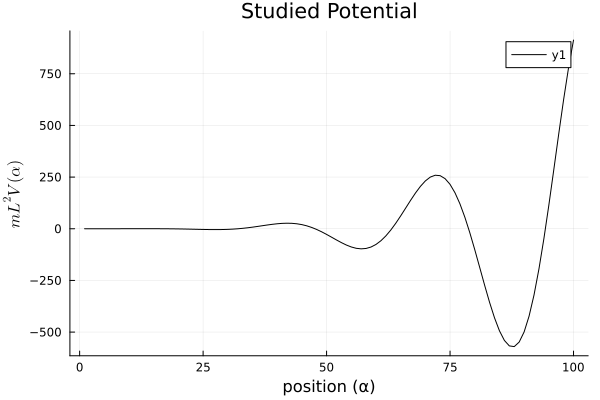

In [4]:
using Plots
using LaTeXStrings

plotFont = "Computer Modern"
#default(plotFont, linewidth = 2, framestyle = :box, label = nothing, grid = true)

plot(mL²V(α), title = "Studied Potential", 
    linecolor = :black, xlabel = "position (α)",ylabel  = L"mL^2V(\alpha)" )

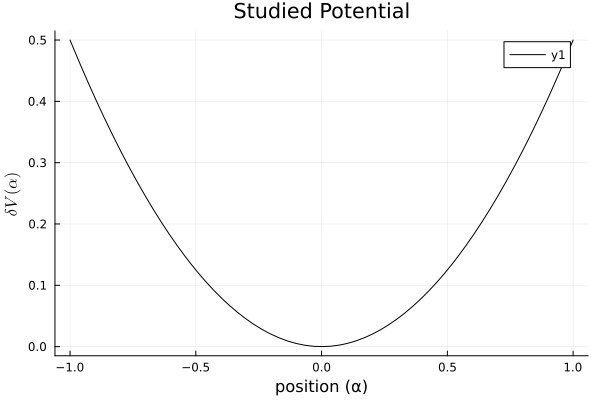

In [5]:
plot(δV, -1, 1, title = "Studied Potential", 
    linecolor = :black, xlabel = "position (α)",ylabel  = L"\delta V(\alpha)" )

to setup the matrix form of the system of $N-2$ (the states $0$ and $N$ are zero by the boundary conditions) equations we first note that we'll only have three diagonals with non-null values, the main one $i$, the one below $i-1$ and the one above $i+1$. And each will hold the coefficients in front of the corresponding $\psi_n$, that is $1/\Delta\alpha^2+mL^2V_i$ for the main one and $-1/2\Delta \alpha^2$ for the other two. 

This matrix of coefficients will then be multiplied by the column vector of $\psi$s and this product will be equal to the same vector of $\psi$s times $mL^2E$, aka our eigenvalue problem.

In [6]:
mainDiagonalCoeff = 1/(dα^2) .+ mL²V(α);

In [7]:
otherDiagCoeff = -1/(2dα^2) .* ones(length(mainDiagonalCoeff)-1);

we now can use the fact that we have a tridiagonal matrix to compute the eigenvalues and eigenvectors (https://en.wikipedia.org/wiki/Tridiagonal_matrix#Eigenvalues)

In [8]:
H = SymTridiagonal(mainDiagonalCoeff, otherDiagCoeff);

In [9]:
E, Ψ = eigen(H);

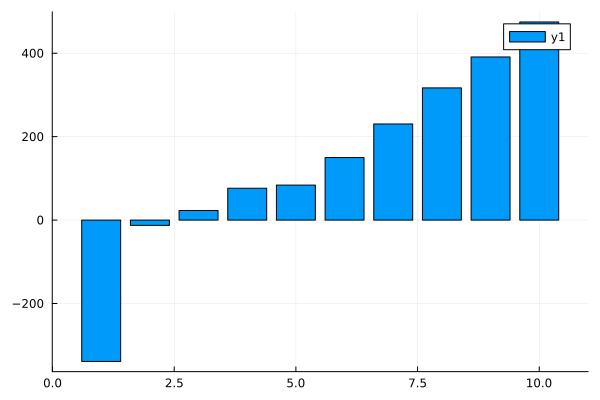

In [10]:
# Energies
bar(1:10, E[1:10], grid = true) 

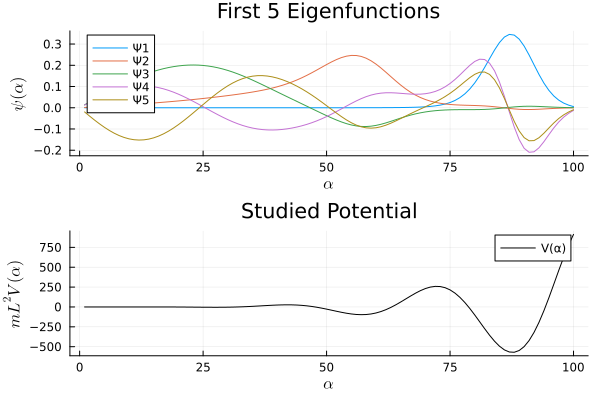

In [11]:
#plot(Ψ)
Ψ = Ψ[:,1:5]
V = mL²V(α)
#plot(mL²V, 0, 1000, title = "Studied Potential", 
#    linecolor = :black, xlabel = "position (α)",ylabel  = L"mL^2V(\alpha)" )
p1 = plot(Ψ, title = "First 5 Eigenfunctions", legend=:topleft, label = ["Ψ1" "Ψ2" "Ψ3" "Ψ4" "Ψ5" "Ψ6"], xlabel = L"\alpha", ylabel = L"\psi(\alpha)")
p2 = plot(V, label = "V(α)", title = "Studied Potential", linecolor = :black, xlabel = L"\alpha", ylabel = L"mL^2V(\alpha)")
p3 = plot(Ψ .^2, title = "First 5 Eigenfunctions squared", legend=:topleft,label = ["Ψ1" "Ψ2" "Ψ3" "Ψ4" "Ψ5" "Ψ6"], xlabel = "position (α)", ylabel = L"|\psi(\alpha)|^2")
plot(p1, p2, layout = (2,1))

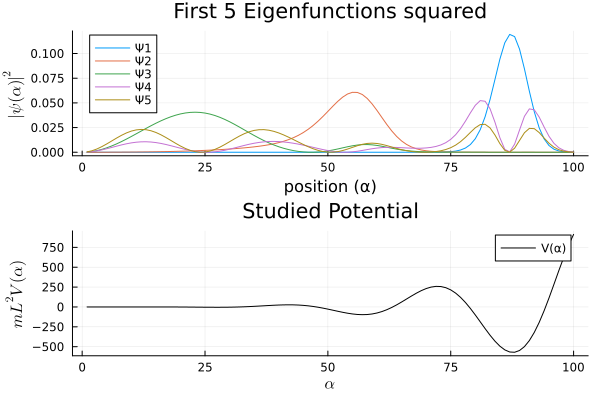

In [12]:
plot(p3,p2, layout = (2,1))

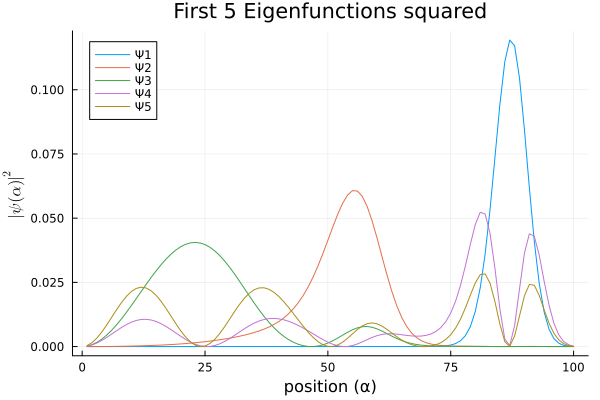

In [13]:
plot(Ψ .^2, title = "First 5 Eigenfunctions squared", legend=:topleft,label = ["Ψ1" "Ψ2" "Ψ3" "Ψ4" "Ψ5" "Ψ6"], xlabel = "position (α)", ylabel = L"|\psi(\alpha)|^2")